# Simple regression with TensorFlow

Basic TF experiments

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Get training data

In [12]:
dat = pd.read_csv("./rbfs/phi_1_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033,2005,2023-07-01
1,1,0.999950,0.937113,0.765652,0.545377,0.338679,0.183361,0.086546,0.035614,0.012777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033,2005,2023-07-01
2,2,0.999802,0.940433,0.771202,0.551358,0.343658,0.186743,0.088468,0.036539,0.013157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-07-01
3,3,0.999555,0.943672,0.776715,0.557350,0.348675,0.190169,0.090424,0.037485,0.013547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023,2005,2023-07-01
4,4,0.999208,0.946828,0.782189,0.563351,0.353730,0.193638,0.092414,0.038451,0.013948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021,2005,2023-07-01


In [13]:
dat.shape

(2665, 221)

In [14]:
X_train = dat.iloc[:, 1:218].to_numpy()
y_train = dat['y'].to_numpy()

(array([ 17.,  93., 205., 338., 544., 529., 471., 362.,  77.,  29.]),
 array([0.002 , 0.0102, 0.0184, 0.0266, 0.0348, 0.043 , 0.0512, 0.0594,
        0.0676, 0.0758, 0.084 ]),
 <BarContainer object of 10 artists>)

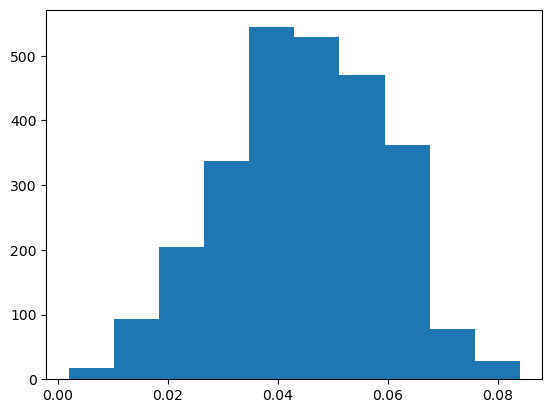

In [26]:
plt.hist(y_train)

Get data for predictions

In [15]:
dat_pred = pd.read_csv("./rbfs/phi_2_reduce.csv")
dat_pred.shape

(94272, 220)

In [16]:
X_test = dat_pred.iloc[:, 1:218].to_numpy()
y_test = dat_pred['y'].to_numpy()

(array([1.2350e+03, 9.3960e+03, 1.1907e+04, 1.7141e+04, 2.8420e+04,
        2.0824e+04, 2.2600e+03, 4.0300e+02, 1.0000e+01, 2.0000e+00]),
 array([-0.0083 ,  0.00408,  0.01646,  0.02884,  0.04122,  0.0536 ,
         0.06598,  0.07836,  0.09074,  0.10312,  0.1155 ]),
 <BarContainer object of 10 artists>)

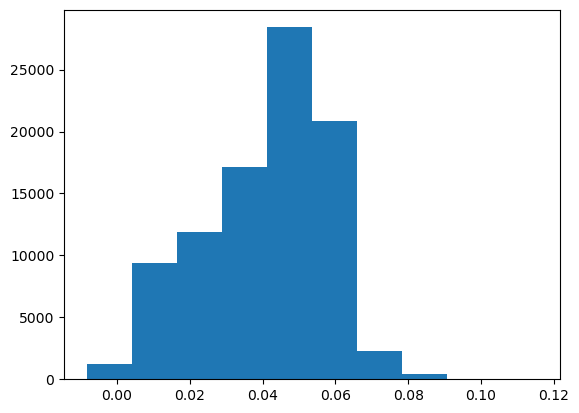

In [27]:
plt.hist(y_test)

## TensorFlow

In [17]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [18]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [19]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               111616    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 604417 (2.31 MB)
Trainable params: 6044

In [20]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [21]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 65ms/step - loss: 0.1493 - mae: 0.1493 - mse: 0.0252 - val_loss: 0.0223 - val_mae: 0.0223 - val_mse: 7.4889e-04
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0301 - mae: 0.0301 - mse: 0.0013 - val_loss: 0.0277 - val_mae: 0.0277 - val_mse: 0.0011
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0272 - mae: 0.0272 - mse: 9.7754e-04 - val_loss: 0.0232 - val_mae: 0.0232 - val_mse: 7.5384e-04
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0181 - mae: 0.0181 - mse: 4.9651e-04 - val_loss: 0.0167 - val_mae: 0.0167 - val_mse: 4.2675e-04
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0145 - mae: 0.0145 - mse: 3.2232e-04 - val_loss: 0.0153 - val_mae: 0.0153 - val_mse: 3.5974e-04
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0126 - mae: 0.0126 - mse: 2.4576e-04 - val_loss: 0.0152 - val_mae: 0.0152 - val_mse: 3.4155e-0

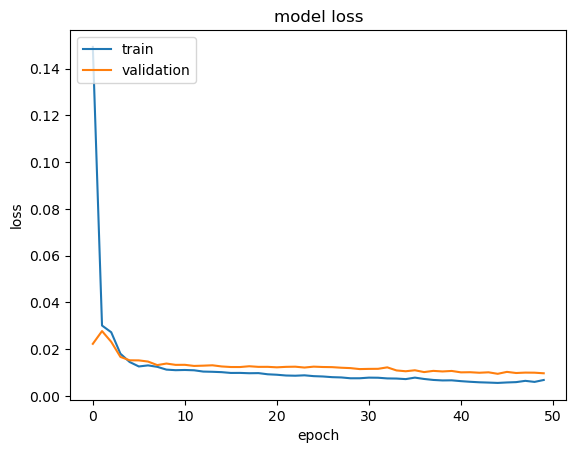

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
y_test_pred = model.predict(X_test)
#mean_absolute_error(y_test, y_test_pred)

2946/2946 [==============================] - 3s 848us/step


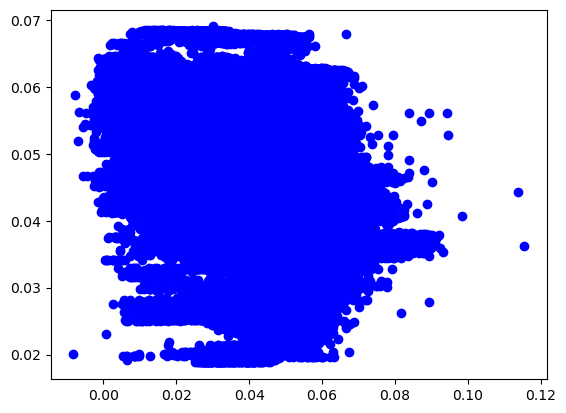

In [28]:
plt.plot(y_test, y_test_pred, 'bo')

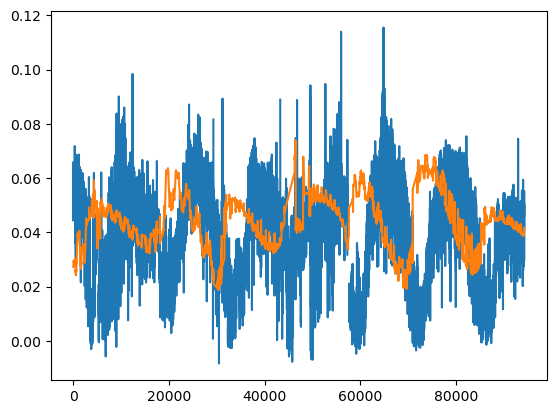

In [29]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()